<a href="https://colab.research.google.com/github/uzair011/CN5021--practical/blob/main/week8_lab_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** U2598219 - Uzair Liyauddeen **

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
# read the data
df  = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
# X, y separation.
X = df.drop("Outcome", axis = 1).values
y = df["Outcome"].values

X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [16]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [17]:
from sklearn.model_selection import train_test_split

# train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [19]:
# Building the model with KNN

from sklearn.neighbors import KNeighborsClassifier

model_0 = KNeighborsClassifier(n_neighbors=4)

model_0.fit(X_train, y_train)

train_accuracy = model_0.score(X_train, y_train)
test_accuracy = model_0.score(X_test, y_test)

print("model_0: Train accuracy: ", train_accuracy)
print("model_0: Test accuracy: ", test_accuracy)

Train accuracy:  0.8175895765472313
Test accuracy:  0.7272727272727273


In [ ]:
# visualizing...
plt.title('KNN- Varying number of neighbours')
plt.plot(neighbors, test_accuracy, label="Testing accuracy")
plt.plot(neighbors, train_accuracy, label="Training accuracy")
plt.legend()
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.show()

** U2598219 - Uzair Liyauddeen **

In [34]:
# Building the model with KNN

# second..... attempt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

BEST_ACCURACY = 0
BEST_k = None
accuracies = []

for k in range(1,10):
  model_1 = KNeighborsClassifier(n_neighbors=k)
  model_1.fit(X_train, y_train)
  y_prediction = model_1.predict(X_test)
  accuracy_1 = accuracy_score(y_test, y_prediction)

  accuracies.append(accuracy_1)

   # return the best k value
  if accuracy_1 > BEST_ACCURACY:
    BEST_ACCURACY = accuracy_1
    BEST_k = k

  print("K : ", k, "Accuracy score : ", accuracy_1)
print("Best k: ", BEST_k)



K :  1 Accuracy score :  0.6623376623376623
K :  2 Accuracy score :  0.7142857142857143
K :  3 Accuracy score :  0.6948051948051948
K :  4 Accuracy score :  0.7272727272727273
K :  5 Accuracy score :  0.6688311688311688
K :  6 Accuracy score :  0.7142857142857143
K :  7 Accuracy score :  0.6753246753246753
K :  8 Accuracy score :  0.7077922077922078
K :  9 Accuracy score :  0.6883116883116883
Best k:  4


** The best K value is : 4 **

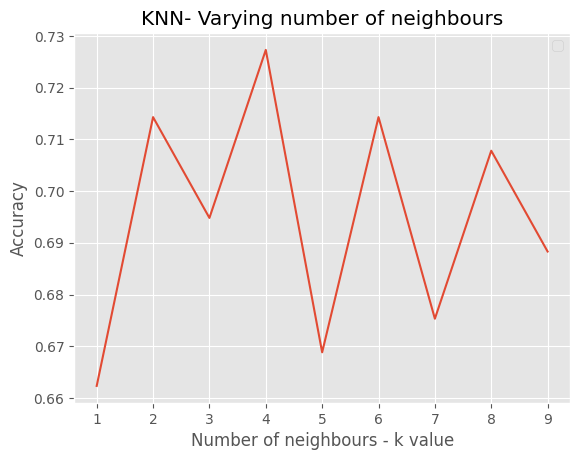

In [35]:
 # visualizing... second model_1
plt.title('KNN- Varying number of neighbours')
plt.plot(range(1, 10), accuracies)

plt.legend()
plt.xlabel("Number of neighbours - k value")
plt.ylabel("Accuracy")
plt.show()

** U2598219 - Uzair Liyauddeen **

**Answer for the first question**

**Briefly explain KNN in context of your problem?**
   - We have to build a model to find an outcome/ solution with the data of 768 diabetes patients with the help of KNN algorithm. it will find the most common/ most suitable outcome in all the outcomes to a patient.